# Chapter 3: Linear Regression
## Simple Linear Regress

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
# Data from R ISLR package - write.csv(Boston, "Boston.csv", col.names = FALSE)
boston_df = pd.read_csv("../../r/Boston.csv")
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# <font color='red'> Warning: The pandas plot function requires to specify the kind (here 'scatter') </font>
Else, only a subset of the samples will be plotted

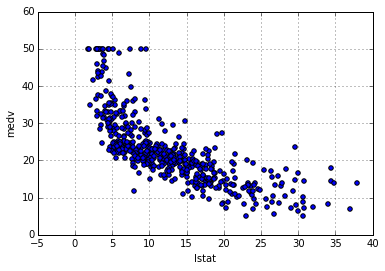

In [3]:
# LSTAT - % of population with low status; MEDV - median value of home
ax = boston_df.plot(kind='scatter', x="lstat", y="medv", style="o")
ax.set_ylabel("medv")

In [62]:
# The statsmodels library provides a small subset of models, but has more emphasis on
# parameter estimation and statistical testing. The summary output is similar to R's
# summary function.
# X is an "array" of column values, y is a single column value
X = boston_df[["lstat"]].values
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 07 Jul 2015   Prob (F-statistic):           5.08e-88
Time:                        22:18:31   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction Interval for new values
The prediction interval is wider than the confidence interval.
While the latter only covers the lower and upper boundary for the mean, the prediction interval refers to the envelope of the predicted values and thus includes the spread from the irreducible error.

In R, both can be calculated with either `predict(fit1,data.frame(lstat=c(5,10,15)),interval="prediction")` for prediction intervals
or with `predict(fit1,data.frame(lstat=c(5,10,15)),interval="confidence")` for the CI.
(ISLR Chapter 3)

In [87]:

sdev, lower, upper = wls_prediction_std(ols, exog=[[1,5],[1,10],[1,15]], alpha=0.05)

print np.array([ols.predict([[1,5],[1,10],[1,15]]), lower, upper]).T


[[ 29.80359411  17.56567478  42.04151344]
 [ 25.05334734  12.82762635  37.27906833]
 [ 20.30310057   8.0777421   32.52845905]]


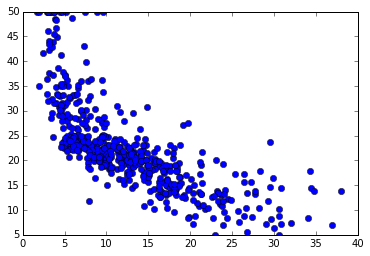

In [6]:
x = boston_df[["lstat"]].values
y= boston_df["medv"].values
ax = plt.plot(x,y , "o")



In [7]:
# Scikit Learn provides a larger number of models, but has more of a Machine Learning POV
# and doesn't come with the statistical testing data shown above. However, it produces an
# identical linear model as shown below:
reg = LinearRegression()
X = boston_df[["lstat"]].values
y = boston_df["medv"].values
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(34.553840879383102, array([-0.95004935]))

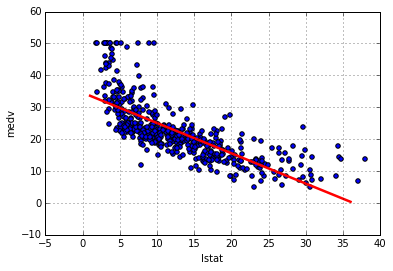

In [8]:
# Drawing the regression line on top of the scatterplot
ax = boston_df.plot(kind='scatter',x="lstat", y="medv", style="o")
ax.set_ylabel("medv")

lstats = boston_df["lstat"].values
xs = range(int(np.min(X[:,0])), int(np.max(X[:,0])))
ys = [reg.predict([x]) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

# Multiple Linear Regression

In [9]:
# regression with 2 input columns
X = boston_df[["lstat", "age"]]
reg2 = LinearRegression()
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(33.2227605317929, array([-1.03206856,  0.03454434]))

In [10]:
X = boston_df[["lstat", "age"]].values
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 06 Jul 2015   Prob (F-statistic):           2.98e-88
Time:                        17:21:03   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000        31.787    34.659
x1            -1.0321      0.048    -21.416      0.000        -1.127    -0.937
x2             0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ols.predict([5,20,1])

array([ 145.50697571])

In [13]:
# fit multiple with statsmodel OLS
# the benefit is that we get summary stats, incl. R^2 and t and p values
X = boston_df[["lstat", "age"]].values
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()

In [14]:
# Test OLS api - check that fitted values equals predicted results of the input values
np.all(ols.predict(X) == ols.fittedvalues)

True

## Plot 2-dim data

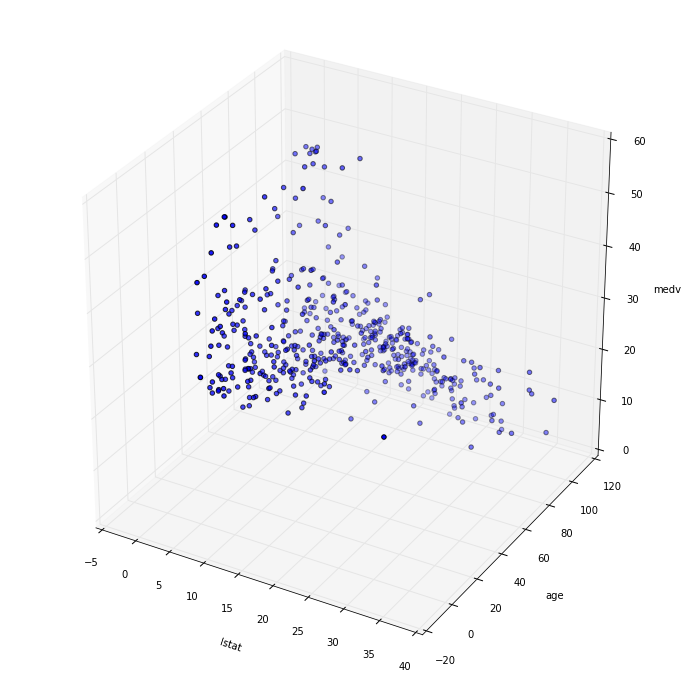

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib  import cm
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
X = boston_df[["lstat", "age"]].values

ax.scatter(X[:,0],X[:,1], y, 'o', label="Data",cmap = cm.jet)
ax.set_xlabel('lstat')
ax.set_ylabel('age')
ax.set_zlabel('medv')


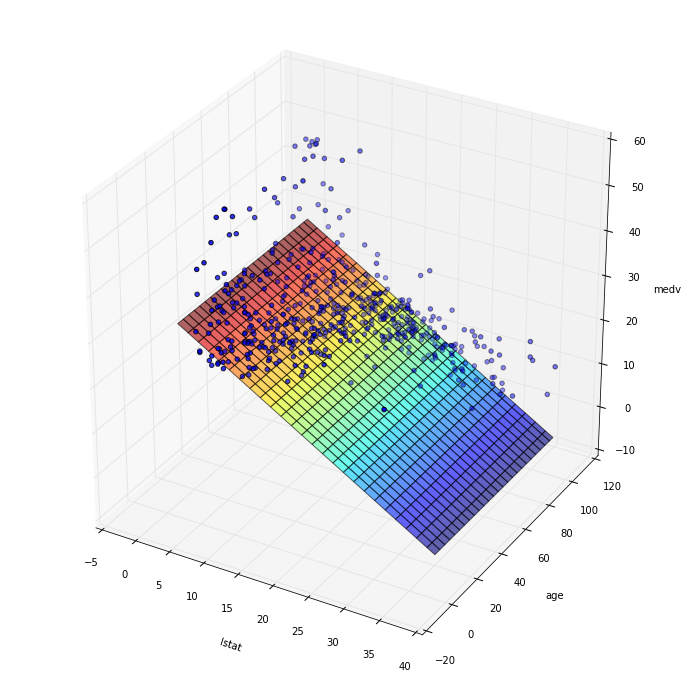

In [16]:

#Data
X = boston_df[["lstat", "age"]].values
# X = sm.add_constant(X)  # add the intercept term
fx = X[:,0]
fy = X[:,1]
fz = ols.fittedvalues


# #generate data for regression equation
Xs = np.linspace(np.min(fx), np.max(fx), num=100)
Ys = np.linspace(np.min(fy), np.max(fy), num=100)
Xs, Ys = np.meshgrid(Xs, Ys)

# #3D regression solved using DataFit(R), http://www.oakdaleengr.com/
# Zs = 41.0909875400163+15.3581432751401*np.log(Xs)+-90.9714747515509*Ys+64.9652271333282*Ys**2
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(fx, fy, fz, marker="o", )

ax.scatter(X[:,0],X[:,1], y, 'o', label="Data",cmap = cm.jet, zorder = 0.7)
ax.set_xlabel('lstat')
ax.set_ylabel('age')
ax.set_zlabel('medv')


data = np.vstack((Xs[0],Ys[:,0]))
# print data
params = sm.add_constant(data.T)


#plot wireframe
# ax.plot_wireframe(Xs, Ys, ols.predict(params), rstride=4, cstride=4, alpha=0.4)

#plot surface, more colormaps: http://matplotlib.sourceforge.net/examples/pylab_examples/show_colormaps.html
ax.plot_surface(Xs, Ys, ols.predict(params), rstride=4, cstride=4, alpha=.6,cmap=cm.jet, zorder = 0.5)



In [17]:
# regression using all input columns
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
reg3 = LinearRegression()
reg3.fit(X, y)
(reg3.intercept_, reg3.coef_)

(36.461351871166876,
 array([ -2.52625878e-03,  -1.08762336e-01,   4.80307622e-02,
          1.99323137e-02,   2.70524534e+00,  -1.75416021e+01,
          3.83922506e+00,  -1.93844593e-03,  -1.49330389e+00,
          3.24925469e-01,  -1.15975305e-02,  -9.47985187e-01,
          9.35664033e-03,  -5.26183831e-01]))

In [18]:
# fit all columns with statsmodel OLS API
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
X = sm.add_constant(X)  # add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 06 Jul 2015   Prob (F-statistic):          3.44e-134
Time:                        17:21:04   Log-Likelihood:                -1498.0
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     491   BIC:                             3089.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4614      5.101      7.148      0.000        26.439    46.484
Unnamed: 0    -0.0025      0.002     -1.215      0.225        -0.007     0.002
crim          -0.1088      0.033     -3.310      0.001        -0.173    -0.044
zn             0.0480      0.014      3.484      0.001         0.021     0.075
indus          0.0199      0.061      0.324      0.746        -0.101     0.141
chas           2.7052      0.861      3.141      0.002         1.013     4.398
nox          -17.5416      3.822     -4.589      0.000       -25.052   -10.031
rm             3.8392      0.418      9.175      0.000         3.017     4.661
age           -0.0019      0.013     -0.145      0.885        -0.028     0.024
dis           -1.4933      0.200     -7.471      0.000        -1.886    -1.101
rad            0.3249      0.068      4.771      0.000         0.191     0.459
tax           -0.0116      0.004     -3.046      0.002        -0.019    -0.004
ptratio       -0.9480      0.131     -7.246      0.000        -1.205    -0.691
black          0.0094      0.003      3.485      0.001         0.004     0.015
lstat         -0.5262      0.051    -10.377      0.000        -0.626    -0.427
==============================================================================
Omnibus:                      175.545   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.925
Skew:                           1.502   Prob(JB):                    5.85e-166
Kurtosis:                       8.202   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Test results are equal to LinearRegression
# index 0 holds the intercept (const), which is not part of the LinearRegression.coef_
eps = 0.0000000001
np.all(np.abs(ols.params.values[1:] - reg3.coef_) < eps)

True

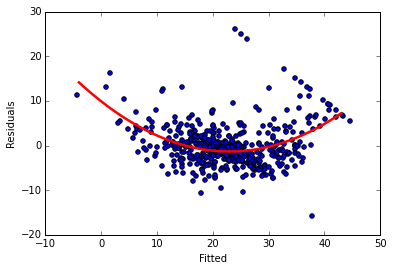

In [20]:
# Plotting a fitted regression with R returns 4 graphs - Residuals vs Fitted, Normal Q-Q,
# Scale-Location (Standardized Residuals vs Fitted), and Residuals vs Leverage. Only the 
# Q-Q plot is available from statsmodels. The residuals vs Fitted function is implemented
# below and is used for plot #1 and #3. The Residuals vs Leverage is TBD.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
   
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
fitted = reg3.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

# Nonlinear Terms and Interactions
Python offers formula parsing support via the [Patsy](http://patsy.readthedocs.org/en/latest/) toolkit. StatsModels uses Patsy to provide formula parsing support for its models. But this can be easily implemented as temporary columns in Pandas dataframes as shown below.

In [21]:
# fitting medv ~ lstat * age
boston_df["lstat*age"] = boston_df["lstat"] * boston_df["age"]
reg5 = LinearRegression()
X = boston_df[["lstat", "age", "lstat*age"]]
y = boston_df["medv"]
reg5.fit(X, y)
(reg5.intercept_, reg5.coef_)

(36.088535934612899,
 array([ -1.39211684e+00,  -7.20859509e-04,   4.15595185e-03]))

In [22]:
X = boston_df[["lstat", "age", "lstat*age"]]
X = sm.add_constant(X)
y = boston_df["medv"]
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 06 Jul 2015   Prob (F-statistic):           4.86e-88
Time:                        17:21:04   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat*age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# fitting medv ~ lstat + I(lstat^2)
boston_df["lstat^2"] = boston_df["lstat"] ** 2
reg6 = LinearRegression()
X = boston_df[["lstat", "lstat^2"]]
y = boston_df["medv"]
reg6.fit(X, y)
# save the predicted ys for given xs for future plot
lstats = boston_df["lstat"].values
xs = range(int(np.min(lstats)), int(np.max(lstats)))
ys6 = [reg6.predict([x, x*x]) for x in xs]
(reg6.intercept_, reg6.coef_)

(42.862007328169327, array([-2.3328211 ,  0.04354689]))

In [43]:
# fitting medv ~ poly(lstat,4). We already have lstat^2 and lstat from previous
boston_df["lstat^4"] = np.power(boston_df["lstat"], 4)
boston_df["lstat^3"] = np.power(boston_df["lstat"], 3)
X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
y = boston_df["medv"]
reg7 = LinearRegression()
reg7.fit(X, y)
ys7 = [reg7.predict([x**4, x**3, x**2, x]) for x in xs]
(reg7.intercept_, reg7.coef_)

(57.309955218472439,
 array([  1.94867775e-04,  -1.63101703e-02,   4.95481136e-01,
         -7.02846009e+00]))

In [44]:
# X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
X = sm.add_constant(X)
# X = boston_df[[1., "lstat^4", "lstat^3", "lstat^2", "lstat"]]
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     257.8
Date:                Tue, 07 Jul 2015   Prob (F-statistic):          4.16e-120
Time:                        11:58:27   Log-Likelihood:                -1557.4
No. Observations:                 506   AIC:                             3125.
Df Residuals:                     501   BIC:                             3146.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         57.3100      2.280     25.134      0.000        52.830    61.790
lstat^4        0.0002   4.04e-05      4.820      0.000         0.000     0.000
lstat^3       -0.0163      0.003     -5.448      0.000        -0.022    -0.010
lstat^2        0.4955      0.075      6.616      0.000         0.348     0.643
lstat         -7.0285      0.731     -9.618      0.000        -8.464    -5.593
==============================================================================
Omnibus:                      128.764   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.790
Skew:                           1.197   Prob(JB):                     6.20e-85
Kurtosis:                       6.558   Cond. No.                     2.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# the LinearRegression module provides bogus results,
# use the statsmodel instead
ys7 = [ols.predict([1., x**4, x**3, x**2, x]) for x in xs]

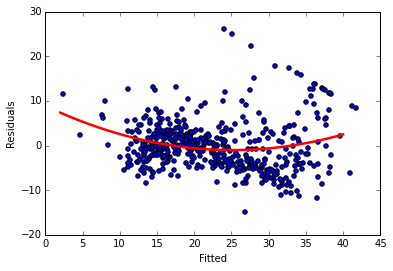

In [27]:
X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
fitted = reg7.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

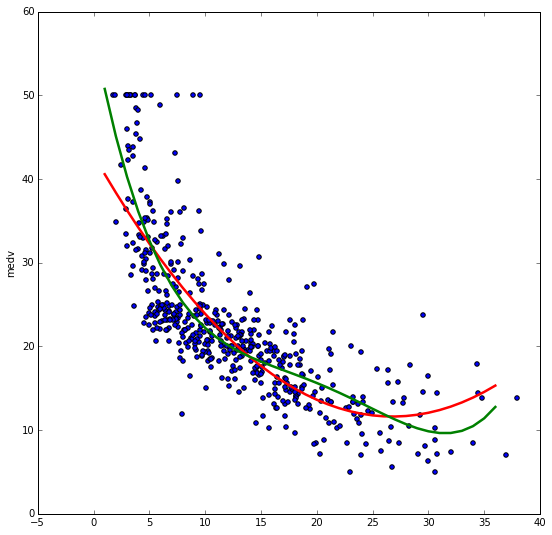

In [45]:
# Plot the different lines. Not that the green line (reg7) follows the distribution
# better than the red line (reg6).
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.scatter(boston_df["lstat"], boston_df["medv"])
ax.set_ylabel("medv")
plt.plot(xs, ys6, color='r', linewidth=2.5)
plt.plot(xs, ys7, color='g', linewidth=2.5)



# Plot with confidence interval of prediction

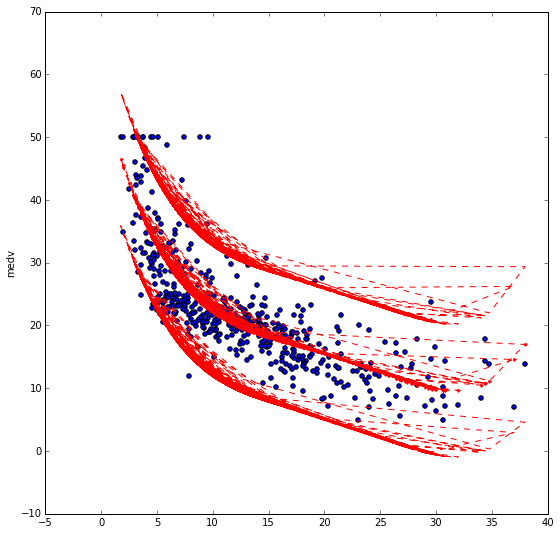

In [55]:

# Plot the different lines. Not that the green line (reg7) follows the distribution
# better than the red line (reg6).
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.scatter(boston_df["lstat"], boston_df["medv"])
ax.set_ylabel("medv")
# plt.plot(xs, ys6, color='r', linewidth=2.5)
# plt.plot(xs, ys7, color='g', linewidth=2.5)

X = boston_df[['lstat','lstat^2','lstat^3','lstat^4']].values
X = sm.add_constant(X)
X.sort()
res = sm.OLS(y, X).fit()

prstd, iv_l, iv_u = wls_prediction_std(res)
             
plt.plot(boston_df['lstat'].values, iv_u, 'r--')
plt.plot(boston_df['lstat'].values, iv_l, 'r--')

plt.plot(boston_df['lstat'].values, res.fittedvalues, 'r--.');

In [58]:
res.predict([1.,2,2**2,2**3,2**4])
res.bse

const    2.280139
x1       0.730791
x2       0.074892
x3       0.002994
x4       0.000040
dtype: float64

# Categorical Data

In [29]:
# Data from ISLR package: write.csv(Carseats, 'Carseats.csv', col.names=FALSE)
carseats_df = pd.read_csv("../../r/Carseats.csv")
carseats_df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
# convert non-numeric to factors
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]


In [32]:
carseats_df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,0,38,13,Yes,No


In [33]:
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]

In [34]:
carseats_df["Income:Advertising"] = carseats_df["Income"] * carseats_df["Advertising"]
carseats_df["Age:Price"] = carseats_df["Age"] * carseats_df["Price"]


In [35]:
carseats_df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income:Advertising,Age:Price
0,1,9.50,138,73,11,276,120,0,42,17,0,0,803,5040
1,2,11.22,111,48,16,260,83,1,65,10,0,0,768,5395
2,3,10.06,113,35,10,269,80,2,59,12,0,0,350,4720
3,4,7.40,117,100,4,466,97,2,55,14,0,0,400,5335
4,5,4.15,141,64,3,340,128,0,38,13,0,1,192,4864


In [36]:
X = carseats_df[carseats_df[1:].columns]
y = carseats_df["Sales"]
reg = LinearRegression()
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(6.8034466949029593e-13,
 array([  2.18466738e-17,   1.00000000e+00,  -2.26901831e-15,
         -6.57460197e-16,  -6.30051566e-15,   1.57914046e-16,
         -3.15025783e-15,  -8.90953977e-15,  -8.74300632e-15,
          7.63278329e-16,  -1.00184618e-14,  -8.07340306e-15,
          1.12973866e-16,  -1.47451495e-17]))

In [37]:
Xsm = sm.add_constant(X)

In [38]:
ols = sm.OLS(y,Xsm).fit()

In [39]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.384e+28
Date:                Mon, 06 Jul 2015   Prob (F-statistic):               0.00
Time:                        21:59:46   Log-Likelihood:                 11314.
No. Observations:                 400   AIC:                        -2.260e+04
Df Residuals:                     385   BIC:                        -2.254e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               3.606e-13   1.34e-13      2.696      0.007      9.76e-14  6.24e-13
Unnamed: 0         -3.203e-16   5.71e-17     -5.606      0.000     -4.33e-16 -2.08e-16
Sales                  1.0000    3.5e-15   2.86e+14      0.000         1.000     1.000
CompPrice          -6.418e-16   6.17e-16     -1.041      0.299     -1.85e-15   5.7e-16
Income              1.064e-15   3.33e-16      3.195      0.002      4.09e-16  1.72e-15
Advertising        -1.388e-17    2.9e-15     -0.005      0.996     -5.71e-15  5.68e-15
Population         -7.665e-17   4.67e-17     -1.642      0.101     -1.68e-16  1.51e-17
Price               4.215e-16   1.02e-15      0.412      0.681     -1.59e-15  2.44e-15
ShelveLoc          -1.665e-15   8.08e-15     -0.206      0.837     -1.75e-14  1.42e-14
Age                 1.041e-15   2.04e-15      0.509      0.611     -2.98e-15  5.06e-15
Education          -1.527e-16    2.5e-15     -0.061      0.951     -5.07e-15  4.76e-15
Urban               1.197e-15   1.43e-14      0.084      0.933     -2.68e-14  2.92e-14
US                 -1.277e-15   1.89e-14     -0.068      0.946     -3.84e-14  3.58e-14
Income:Advertising -1.383e-16   3.54e-17     -3.909      0.000     -2.08e-16 -6.88e-17
Age:Price          -4.901e-17   1.69e-17     -2.895      0.004     -8.23e-17 -1.57e-17
==============================================================================
Omnibus:                        5.572   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.544
Skew:                           0.288   Prob(JB):                       0.0625
Kurtosis:                       3.006   Cond. No.                     1.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# R has a contrasts() function that shows how factors are encoded by default. We can do 
# this manually using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

colnames = ["ShelveLoc", "Urban", "US"]
enc = OneHotEncoder()
X = carseats_df[colnames]
enc.fit(X)
X_tr = enc.transform(X).toarray()
colnos = enc.n_values_
colnames_tr = []
for (idx, colname) in enumerate(colnames):
    for i in range(0, colnos[idx]):
        colnames_tr.append(colname + "_" + str(i))
col = 0
for colname_tr in colnames_tr:
    carseats_df[colname_tr] = X_tr[:, col]
    col = col + 1
del carseats_df["ShelveLoc"]
del carseats_df["Urban"]
del carseats_df["US"]
carseats_df[colnames_tr].head()

,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
0,1,0,0,1,0,1,0
1,0,1,0,1,0,1,0
2,0,0,1,1,0,1,0
3,0,0,1,1,0,1,0
4,1,0,0,1,0,0,1


In [41]:
def regplot(x, y, xlabel, ylabel, dot_style, line_color):
    x = x.values
    y = y.values
    reg = LinearRegression()
    X = np.matrix(x).T
    reg.fit(X, y)
    ax = plt.scatter(x, y, marker=dot_style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    xs = range(int(np.min(x)), int(np.max(x)))
    ys = [reg.predict(x) for x in xs]
    plt.plot(xs, ys, color=line_color, linewidth=2.5)

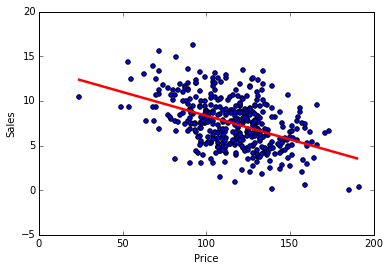

In [42]:
regplot(carseats_df["Price"], carseats_df["Sales"], "Price", "Sales", 'o', 'r')

# Adding lines for residuals

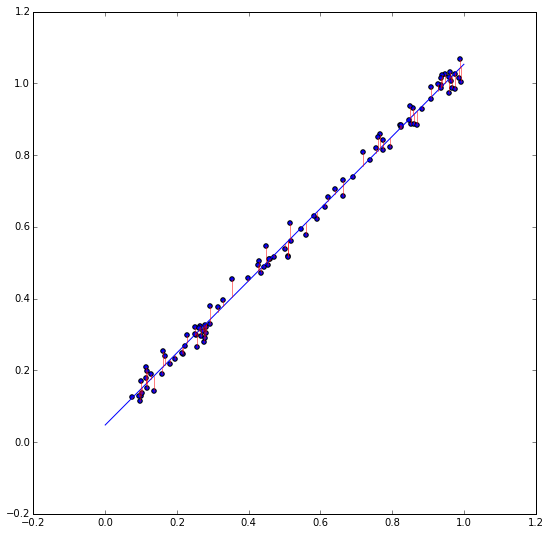

In [61]:

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

# print results.summary()
fig = plt.figure(figsize=(9,9))
plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])

for (x,y) in zip(X,Y):
    plt.plot([x, x], [y, results.predict([1,x])[0]], color='r', linestyle='-', linewidth=0.5)
